#### Wireless Power Transfer - Projeto de Eletromagnetismo e Ondulat√≥ria

Integrantes: Beatriz Rodrigues, Carlos Eduardo, Ellen Coutinho e Rafael Dourado

---

Esse projeto tem por objetivo alimentar uma carga por meio de um sistema capaz de transmitir energia sem a necessidade de fios. O m√©todo utilizado para isso √© o de **acoplamento ressonante por campos pr√≥ximos**. 

O fen√¥meno da resson√¢ncia ocorre quando a frequ√™ncia de excita√ß√£o √© igual a frequ√™ncia natural, o que maximiza a corrente. O circuito utilizado pode ser visualizado a seguir:


<img src="https://imgur.com/ggAPgAk.jpg" alt="circuito">

---

##### Simula√ß√£o

Considera-se as seguintes condi√ß√µes:
- $R_1=0,5\Omega$
- $R_2=0,5\Omega$
- $R_c=400\Omega$
- $L_1=300 mH$ 
- $L_2=300 mH$
- $f=60Hz$
- $k=0,5$
- $V_1(t)=50\cdot cos(\omega \cdot t)\space [V]$

In [30]:
# Bibliotecas
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Vari√°veis
R1 = R2 = 0.5
L1 = L2 = 300e-6
C1 = C2 = 0.1e-6
f = 60
omega = 2*pi*f
XL1 = L1*omega*1j
XL2 = L2*omega*1j
XC1 = XC2 = 1/(C1*omega*1j)


No circuito anteriormente representado, considerando $I_3$ a corrente que passa no capacitor $C_2$ e $I_4$ a corrente que passa na carga e aplicando Kirchoff, temos:


- Malha 1:

$$U_f - R_1\cdot I_1 - XL_1\cdot I_1 + XM\cdot I_2= 0$$

- Malha 2:

$$XM\cdot I_2 - R_2\cdot I_2 - XL_2\cdot I_4 = 0$$

- Malha 3:
$$XC_2\cdot I_3 - R_c\cdot I_4 = 0$$

- N√≥:

$$I_2 = I_3 + I_4$$

Para criar a fun√ß√£o do transformador √© necess√°rio equa√ß√µes que dependam apenas das correntes $I_1$ e $I_2$, portanto √© necess√°rio achar a express√£o de $I_4$ em fun√ß√£o de $I_2$.

Usando a equa√ß√£o do n√≥ e da Malha 3, obtemos:

$$I_4 = \frac{I_2}{\frac{R_c}{XC_2}+1}$$

Dessa forma usaremos as seguintes equa√ß√µes:

- Malha 1:

$$U_f - R_1\cdot I_1 - XL_1\cdot I_1 + XM\cdot I_2= 0$$

- Malha 2:

$$XM\cdot I_2 - R_2\cdot I_2 - XL_2\cdot \frac{I_2}{\frac{R_c}{XC_2}+1} = 0$$

In [32]:
# Fun√ß√µes

def CalcularTransformador(v1, Rc, XM) -> tuple[complex, complex]:
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+Rc/((Rc/XC2)+1)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

def forma_polar(complexo):
    return f'{abs(complexo):.4f} ‚à† {degrees(phase(complexo)):.4f}¬∫'

O c√°lculo da indut√¢ncia m√∫tua est√° demonstrado abaixo. Nesse caso, a indut√¢ncia m√∫tua √© multiplicada pelo fator k porque apenas parte do fluxo magn√©tico produzido por uma das bobinas chega √† outra.

$$ M = k\cdot \sqrt{L_1\cdot L_2}$$

Inicialmente, adotou-se $k = 0,5$. Para esses valores, calculou-se $I_1$ e $I_2$.

In [33]:
M = sqrt(L1*L2)
XM = M*omega*1j
k = 0.5
Rc = 400
XM_k = k*XM

i1, i2 = CalcularTransformador(50, Rc, XM_k)
print(f"i1 transformador: {forma_polar(i1)} A")
print(f"i2 transformador: {forma_polar(i2)} A")

i1 transformador: 0.0019 ‚à† 89.9989¬∫ A
i2 transformador: 0.0000 ‚à† -179.1544¬∫ A


**Como I1 e I2 variam em fun√ß√£o da frequ√™ncia?**

Frequ√™ncia de Resson√¢ncia Estimada: 29057.584 Hz


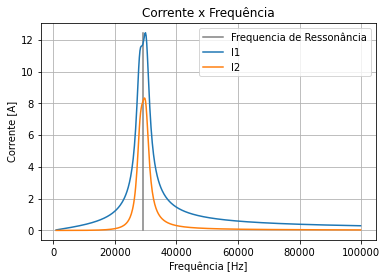

In [34]:
freq_res = (sqrt(1/(L1*C1))/(2*pi)).real
print(f"Frequ√™ncia de Resson√¢ncia Estimada: {freq_res:.3f} Hz")

lista_f = np.arange(1000, 100e3, 200)
lista_i1 = []
lista_i2 = []

for f in lista_f:
    w = 2*pi*f
    XL1 = XL2 = L1*w*1j
    XM = M*w*1j
    XC1 = XC2 = 1/(C1*w*1j)
    XM_k = 0.1*XM
    i1, i2 = CalcularTransformador(50, Rc, XM_k)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))
f_res = lista_f[list(lista_i2).index(max(lista_i2))]

plt.plot([freq_res, freq_res], [0, max(lista_i1)], "gray", label = "Frequencia de Resson√¢ncia")
plt.plot(lista_f, lista_i1, label = "I1")
plt.plot(lista_f, lista_i2, label = "I2")
plt.title("Corrente x Frequ√™ncia")
plt.xlabel("Frequ√™ncia [Hz]")
plt.ylabel("Corrente [A]")
plt.legend()
plt.grid()
plt.show()

Conforme explicado no in√≠cio, ambas as correntes s√£o m√°ximas na frequ√™ncia de resson√¢ncia.

Ao variar o k, visualiza-se o seguinte comportamento:

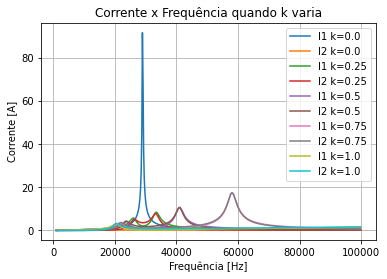

In [35]:
lista_k = np.linspace(0,1,5)

for k in lista_k:
    lista_i1 = []
    lista_i2 = []
    for f in lista_f:
        w = 2*pi*f
        XL1 = XL2 = L1*w*1j
        XM = M*w*1j
        XC1 = XC2 = 1/(C1*w*1j)
        XM_k = k*XM
        i1, i2 = CalcularTransformador(50, Rc, XM_k)
        lista_i1.append(abs(i1))
        lista_i2.append(abs(i2))
    plt.plot(lista_f, lista_i1, label = f"I1 k={k}")
    plt.plot(lista_f, lista_i2, label = f"I2 k={k}")
plt.title("Corrente x Frequ√™ncia quando k varia")
plt.xlabel("Frequ√™ncia [Hz]")
plt.ylabel("Corrente [A]")
plt.grid()
plt.legend()
plt.show()

**Como a indut√¢ncia influencia no gr√°fico do m√≥dulo da tens√£o V2 em fun√ß√£o da frequ√™ncia de resson√¢ncia?**

In [36]:
lista_L = np.linspace(50e-6, 600e-6, 6)
lista_fr = np.linspace(1, 100e3, 1000)
Rc = 400

for L in lista_L:
    lista_V2 = []
    for fr in lista_fr:
        w = 2*pi*fr
        C = 1/(L*(2*pi*fr)**2)
        XC1 = XC2 = 1/(C*1j*w)
        XL1 = XL2 = L*w*1j
        XM_k = 0.1*M*w*1j
        i1, i2 = CalcularTransformador(50, Rc, XM_k)
        i4 = i2/((Rc/XC2)+1)
        lista_V2.append(Rc*i4)
    plt.plot(lista_fr, lista_V2, label = f"L: {L:.4f}")
plt.xlabel("Frequ√™ncia de resson√¢ncia [Hz]")
plt.ylabel("Tens√£o V2 [V]")
plt.title("V2 x Frequ√™ncia de resson√¢ncia")
plt.legend()
plt.grid()
plt.show()

c:\Users\Beatriz Rodrigues\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Beatriz Rodrigues\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Beatriz Rodrigues\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Beatriz Rodrigues\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Beatriz Rodrigues\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return a

Quanto maior a indut√¢ncia, maior a amplitude m√°xima de V2.

**Como a frequ√™ncia escolhida modifica a rela√ß√£o entre a pot√™ncia de entrada e sa√≠da (efici√™ncia)?**

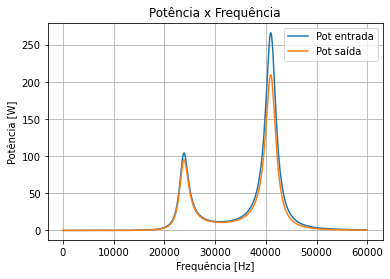

In [37]:
lista_f = np.linspace(10, 60e3, 1000)
lista_Pe = []
lista_Ps = []
V1 = 50
k = 0.5
for f in lista_f:
    w = 2*pi*f
    XC1 = XC2 = 1/(C1*1j*w)
    XL1 = XL2 = L1*w*1j
    XM_k = k*M*w*1j
    i1, i2 = CalcularTransformador(V1, Rc, XM_k)
    i4 = i2/((Rc/XC2)+1)
    Pe = (V1*(i1.conjugate())/2).real
    lista_Pe.append(Pe)
    Ps = (Rc*abs(i4)**2).real/2
    lista_Ps.append(Ps)

plt.plot(lista_f, lista_Pe, label = "Pot entrada")
plt.plot(lista_f, lista_Ps, label = "Pot sa√≠da")
plt.title("Pot√™ncia x Frequ√™ncia")
plt.xlabel("Frequ√™ncia [Hz]")
plt.ylabel("Pot√™ncia [W]")
plt.grid()
plt.legend()
plt.show()

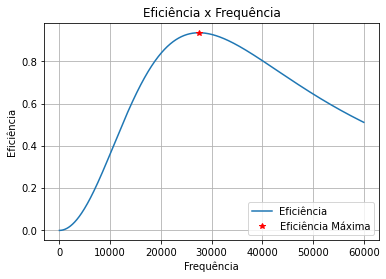

Melhor Fr√™quencia: 27512.92Hz
Efici√™ncia M√°xima: 0.93


In [38]:
lista_efic = [lista_Ps[i]/lista_Pe[i] for i in range(len(lista_f))]
efic_max = max(lista_efic)
melhor_freq = lista_f[lista_efic.index(efic_max)]

plt.plot(lista_f, lista_efic, label = "Efici√™ncia")
plt.plot(melhor_freq, efic_max, "r*", label = "Efici√™ncia M√°xima")
plt.title("Efici√™ncia x Frequ√™ncia")
plt.xlabel("Frequ√™ncia")
plt.ylabel("Efici√™ncia")
plt.grid()
plt.legend()
plt.show()

print(f'Melhor Fr√™quencia: {melhor_freq:.2f}Hz')
print(f'Efici√™ncia M√°xima: {efic_max:.2f}')

Por ambos os gr√°ficos, √© poss√≠vel notar que a efici√™ncia m√°xima ocorre na frequ√™ncia de resson√¢ncia.

**Como o pico da tens√£o V2 √© afetado pelo coeficiente de acoplamento k?**

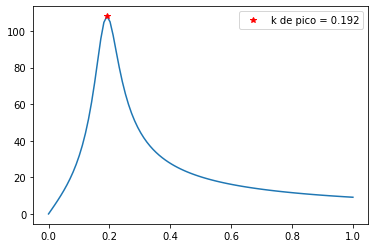

In [39]:
Rc = 10
w = 2*pi*f_res
XL1 = XL2 = L1*w*1j
XC1 = XC2 = 1/(C1*w*1j)
XM = sqrt(L1*L2)*w*1j
lista_k = np.linspace(0,1,100)
lista_V2 = []

for k in lista_k:
    novo_XM = k*XM
    i1, i2 = CalcularTransformador(50,Rc, novo_XM)
    i4 = i2/((Rc/XC2)+1)
    lista_V2.append(abs(Rc*i4))
pico_idx = lista_V2.index(max(lista_V2))
k_top = lista_k[pico_idx]
plt.plot(lista_k, lista_V2)
plt.plot(k_top, max(lista_V2), '*r',label=f'k de pico = {k_top:.3f}')
plt.legend()
plt.show()


Existe um valor de k para o qual obt√©m-se $V_2$ m√°ximo e quanto mais distante desse valor √≥timo, menor o valor de $V_2$.

**Como R1 pode afetar as pot√™ncias?**

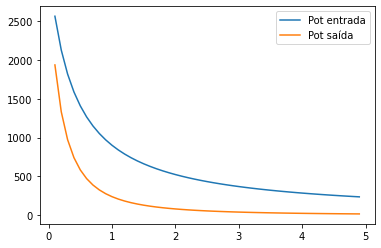

In [40]:
lista_r1 = np.arange(0.1, 5, 0.1)
lista_Pe = []
lista_Ps = []
for R1 in lista_r1:
    i1, i2 = CalcularTransformador(V1, Rc, k_top*XM)
    i4 = i2/((Rc/XC2)+1)
    Pe = (V1*(i1.conjugate())/2).real
    lista_Pe.append(Pe)
    Ps = (Rc*abs(i4)**2).real/2
    lista_Ps.append(Ps)

plt.plot(lista_r1, lista_Pe, label = "Pot entrada")
plt.plot(lista_r1, lista_Ps, label = "Pot sa√≠da")
plt.legend()
plt.show()

O aumento da resist√™ncia $R_1$ altera significantemente as pot√™ncias. Portanto, percebe-se que a resist√™ncia associada ao uso de jumpers √© influente para modificar os resultados do modelo.

---
#### Altera√ß√µes com os dados do circuito f√≠sico

Para encontrar a indut√¢ncia ideal de nossas bobinas, utilizamos a frequ√™ncia de resso√¢ncia e o valor do capacitor escolhidos.
$$\omega_{res} = 2\cdot\pi\cdot f_{res} = \sqrt{\frac{1}{L\cdot C}} \rightarrow L = \frac{1}{(2\cdot\pi\cdot f)^2\cdot C}$$

In [41]:
# Fun√ß√£o para encontrar o L

def encontra_L(f, C):
    # Retorna L (¬µùêª)
    return (1/((2*pi*f)**2*C))*1e6

In [42]:
C = 0.47e-6
f = 30e3
L = encontra_L(f, C)
print(f'L escolhido: {L:.2f} ¬µùêª ')

L escolhido: 59.88 ¬µùêª 


Declarando os Valores dos componentes reais:

In [43]:
C1 = C2 = 0.47e-6
L1 = 67.45e-6
L2 = 67.13e-6
M = sqrt(L1*L2)

k_R1 = 0.87
k_R2 = 0.13
R1 = 353.0e-3 + k_R1
R2 = 377.7e-3 + k_R2

Uf = 9
Rc = 10.4 

f = 30e3
w = 2*pi*f

XC1 = XC2 = 1/(C1*w*1j)
XL1 = L1*w*1j
XL2 = L2*w*1j
XM = M*w*1j


O ajuste nas resist√™ncia foi feito para considerar a influ√™ncia das resist√™ncias dos jumpers e obter um modelo computacionao mais pr√≥ximo dos resultados obtidos experimentalmente. H√° mais jumpers e componentes na parte esquerda do circuito (exibido anteriormente), por esse motivo sua resist√™ncia somada ao R1 √© maior. 

A tens√£o de pico utilizada no modelo computacional √© $U_f\cdot \frac{2}{\pi}$, pois essa √© a onda senoidal que melhor representa a onda quadrada de tens√£o $U_f$. Uma vez que √© a amplitude do primeiro harm√¥nico da transformada de Fourier da onda quadrada de tens√£o $U_f$.

In [44]:
i1, i2 = CalcularTransformador((2/pi)*Uf, 10, XM)
print(forma_polar(i1))
print(forma_polar(i2))

0.3552 ‚à† 44.9624¬∫
0.4587 ‚à† 83.4319¬∫


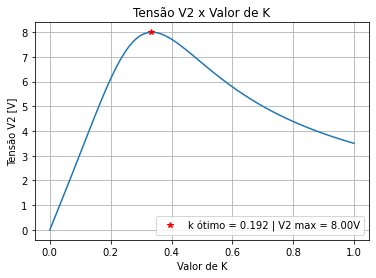

In [45]:
lista_k = np.linspace(0,1,100)
lista_V2 = []

for k in lista_k:
    novo_XM = k*XM
    i1, i2 = CalcularTransformador((2/pi)*Uf, Rc, novo_XM)
    i4 = i2/((Rc/XC2)+1)
    lista_V2.append(abs(Rc*i4))

V2_max = max(lista_V2)
k_real = lista_k[lista_V2.index(V2_max)]   

plt.plot(lista_k, lista_V2)
plt.plot(k_real, V2_max, '*r', label = f'k √≥timo = {k_top:.3f} | V2 max = {max(lista_V2):.2f}V')
plt.legend()
plt.xlabel('Valor de K')
plt.ylabel('Tens√£o V2 [V]')
plt.title('Tens√£o V2 x Valor de K')
plt.grid()
plt.show()

Ajustando a resist√™ncia, obteve-se um gr√°fico onde a tens√£o $V_2$ m√°xima √© de $8V$, assim como o observado no circuito real.

Calculando valores para o K_real

In [46]:
i1, i2 = CalcularTransformador((2/pi)*Uf, Rc, k_real*XM)
i4 = i2/((Rc/XC2)+1)
V2_real = abs(Rc*i4)

In [47]:
# Pot√™ncia de entrada
V1_pico = Uf*(2/pi)

P_entrada = (V1_pico*(i1.conjugate())/2).real
print(f'Pot√™ncia de Entrada: {P_entrada.real:.2f} W')

# Pot√™ncia transmitida
V2_eficaz = V2_real/sqrt(2)

P_transmitida = (V2_eficaz**2)/Rc
print(f'Pot√™ncia Transmitida: {P_transmitida.real:.2f} W')

print(f'Rendimento do Circuito: {(P_transmitida/P_entrada).real*100:.2f}%')


Pot√™ncia de Entrada: 6.85 W
Pot√™ncia Transmitida: 3.08 W
Rendimento do Circuito: 44.91%


O que √© necess√°rio colocar ainda:
- Aplica√ß√µes: o que pode ser feito com a pot√™ncia que encontramos (talvez apenas nos slides)
- Gr√°ficos da simula√ß√£o agora validando o modelo f√≠sico


---

#### Aplica√ß√µes

Com as especifica√ß√µes encontradas nos c√°lculos anteriores, pode-se afirmar que uma poss√≠vel aplica√ß√£o seria na √°rea de eletr√¥nicos, como carregadores sem fio de celular **(i)** e de *smart watches* **(ii)**.

**(i)** Nesse caso, seria necess√°rio aumentar a pot√™ncia transmitida, uma vez que as bobinas possuem um tamanho razo√°vel para que seja feita uma base onde o celular ficaria apoiado. Para atingir a pot√™ncia de um carregador *wireless* comum (aproximadamente $15W$) seria necess√°rio fornecer uma tens√£o ($V_2$) maior, que por sua vez, pode ser amplificada aumentando a tens√£o $V_1$ de alimenta√ß√£o;

<img src="phone_charger.png" width="30%" alt="Carregador Wireless Celular">

**(ii)** Pensando em um carregador para *smart watch*, a pot√™ncia desejada √© de cerca de $3W$, valor pr√≥ximo do obtido. Por√©m, como um *smart watch* √© menor que um celular, a base de apoio precisaria ser menor, detalhe que pode ser ajustado reduzindo o tamanho das bobinas, que implica em aumentar o n√∫mero de voltas.

<img src="smart_charger.png" width="30%" alt="Carregador Wireless Smart Watch">

Para ambos os casos, seria necess√°rio adicionar ao circuito um retificador de onda, para que a bateria possa ser carregada corretamente em corrente cont√≠nua (DC).